<a href="https://colab.research.google.com/github/Hrithik2212/Neural-Networks-and-Mahine-Learning-Course/blob/main/LAB04_BreastCancerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Classification

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## Data Wrangling 

In [2]:
data = pd.read_csv( "/content/Breast cancer data.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [4]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [5]:
X = data.drop(['diagnosis'],axis=1)
y = data['diagnosis']

In [8]:
from sklearn.model_selection import train_test_split as tts 
X_train , X_test , y_train , y_test = tts(X, y , test_size = 0.3)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(398, 171, 398, 171)

## Modelling 

In [9]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
# Test Metrics
def plot_metrics(y_pred , y_test):
  print(cr(y_test , y_pred))
  sns.heatmap(cm(y_test,y_pred),annot =True)
     

### KNN

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        70
           1       0.88      0.92      0.90       101

    accuracy                           0.88       171
   macro avg       0.88      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171



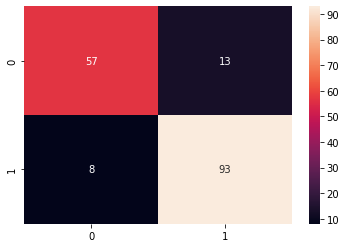

In [10]:
from sklearn.neighbors import KNeighborsClassifier as LR 
lr = LR().fit(X_train , y_train)
y_pred = lr.predict(X_test)
plot_metrics(y_pred , y_test)
     

### SVM

              precision    recall  f1-score   support

           0       0.94      0.71      0.81        70
           1       0.83      0.97      0.89       101

    accuracy                           0.87       171
   macro avg       0.89      0.84      0.85       171
weighted avg       0.88      0.87      0.86       171



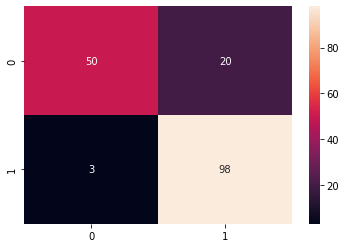

In [11]:
from sklearn.svm import SVC as LR 
lr = LR().fit(X_train , y_train)
y_pred = lr.predict(X_test)
plot_metrics(y_pred , y_test)

### Logistic Regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      0.89      0.89        70
           1       0.92      0.93      0.93       101

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



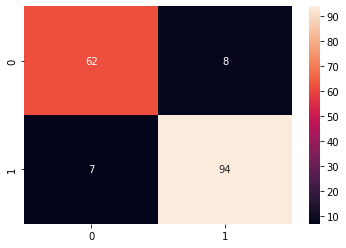

In [12]:
from sklearn.linear_model import LogisticRegression as LR 
from sklearn.metrics import mean_squared_error as mse 
lr = LR().fit(X_train , y_train)
y_pred = lr.predict(X_test)
plot_metrics(y_pred , y_test)
     

### Naive Bayes 

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        70
           1       0.84      0.91      0.88       101

    accuracy                           0.85       171
   macro avg       0.85      0.83      0.84       171
weighted avg       0.85      0.85      0.85       171



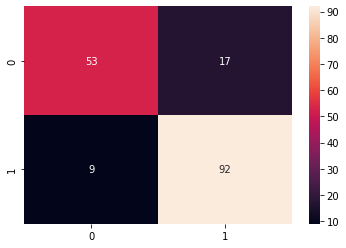

In [13]:
from sklearn.naive_bayes import MultinomialNB as LR 
lr = LR().fit(X_train , y_train)
y_pred = lr.predict(X_test)
plot_metrics(y_pred , y_test)

### Decision Tree

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        70
           1       0.93      0.93      0.93       101

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



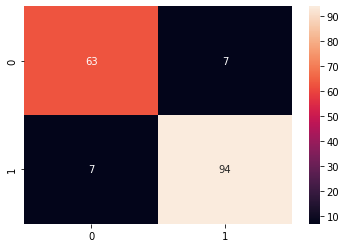

In [18]:
from sklearn.tree import DecisionTreeClassifier as LR
lr = LR().fit(X_train , y_train)
y_pred = lr.predict(X_test)
plot_metrics(y_pred , y_test)

## Conclusion

* DecisionTree gives the highest accuracy of 92 % and is the best model for our purpose 